<a href="https://colab.research.google.com/github/tieubavuongpm92/AI/blob/main/NhandienHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

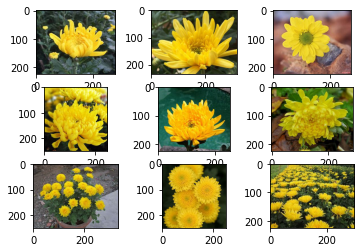

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Train/hoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'cuc'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [6]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Train/hoa/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('mattroi'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('vantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('4Hoa_photos.npy', photos)
save('4Hoa_labels.npy', labels)

(59, 150, 150, 3) (59,)


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
 history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
2/2 [==============================] - 1s 69ms/step - loss: 3667.6792 - accuracy: 0.3390
Epoch 2/20
2/2 [==============================] - 0s 62ms/step - loss: 5915.5659 - accuracy: 0.2203
Epoch 3/20
2/2 [==============================] - 0s 57ms/step - loss: 2220.7153 - accuracy: 0.2034
Epoch 4/20
2/2 [==============================] - 0s 59ms/step - loss: 294.7556 - accuracy: 0.3729
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 91.1081 - accuracy: 0.5254
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 20.1834 - accuracy: 0.5254
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 1.5704 - accuracy: 0.8644
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 1.6287 - accuracy: 0.8983
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.9379 - accuracy: 0.9661
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.5255 - accuracy: 0.9831
Epoch 11/20
2/2 

In [26]:
model.evaluate(photos,labels)

2/2 [==============================] - 0s 29ms/step - loss: 0.0235 - accuracy: 0.9831


[0.023511914536356926, 0.9830508232116699]

In [27]:
model.save('4Hoa_Final.h5')

In [28]:
from keras.models import load_model
models=load_model('4Hoa_Final.h5')

In [29]:
classes = ["Cuc","Mat troi","Thuoc duoc","Van tho"]

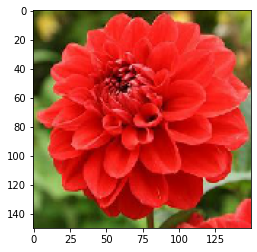

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Colab Notebooks/Train/hoa/thuocduoc4.jpg', target_size=(150,150))
plt.imshow(img)

In [31]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.11633505 0.1604474  0.602683   0.12053453]]


'Thuoc duoc'